In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, display_html
from tqdm import tqdm

In [20]:
import sys
sys.path.append("..")
from rllib.student import student
from rllib.dp import dp
from rllib.linear_solver import linear_solver
from rllib import misc

# Define student MDP

In [10]:
o = student()

# Compute V(s)

In [11]:
# alphas = [0, 0.5, 0.9, 1-0.1**10]
gammas = [0, 0.9, 1-0.1**10, 1+0.1**10, 1.01, 1.1]

In [12]:
result = []
for gamma in gammas[:]:
    result.append([gamma] + list(linear_solver.value_linear_solver(o, gamma)))

In [13]:
g = 'gamma'
df = pd.DataFrame(result, columns=[g] + o.S).set_index(g)
df.style.format(precision=3)

,class1,class2,class3,fb,sleeping
gamma,,,,,
0.000000,-1.500,-1.000,5.500,-0.500,0.000
0.900000,-1.484,2.158,7.018,-2.124,0.000
1.000000,-1.308,2.692,7.385,-2.308,0.000
1.000000,-1.308,2.692,7.385,-2.308,0.000
1.010000,-1.281,2.750,7.426,-2.317,0.000
1.100000,-0.856,3.328,7.869,-2.158,0.000


# plot

,class1,class2,class3,fb,sleeping
gamma,,,,,
0.000000,-1.500,-1.000,5.500,-0.500,0.000
0.900000,-1.484,2.158,7.018,-2.124,0.000
1.000000,-1.308,2.692,7.385,-2.308,0.000
1.000000,-1.308,2.692,7.385,-2.308,0.000
1.010000,-1.281,2.750,7.426,-2.317,0.000
1.100000,-0.856,3.328,7.869,-2.158,0.000


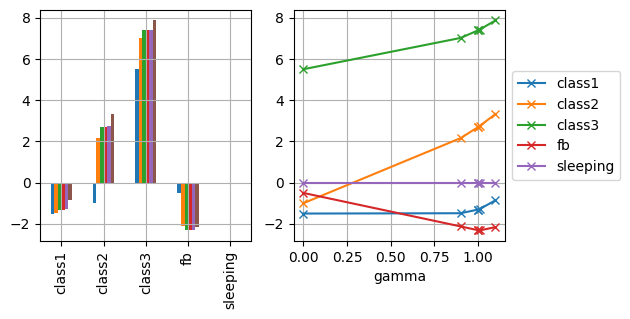

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

df.T.plot(kind='bar', use_index=True, ax=ax1)
ax1.grid(True)
# ax1.legend(loc='center right')
ax1.legend().set_visible(False)


df.plot(use_index=True, marker='x', ax=ax2)
ax2.grid(True)
# ax2.legend(loc='center left')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# print(np.sum(np.einsum('ik,ijk->ij', s.Π, s.P), axis=1))
# print(np.einsum('sa,sa->s', s.Π, s.R))
df.style.format(precision=3)

# compute Q

In [15]:
# alphas = [0, 0.5, 0.9, 1-0.1**10]
gammas = [0, 0.9, 1-0.1**10, 1+0.1**10, 1.01, 1.1]

In [16]:
result = []
for gamma in gammas:
    result.append([gamma] + list(linear_solver.q_linear_solver(o, gamma)))

# plot

In [21]:
res = result[2][1:]
df1 = pd.DataFrame(res, columns=o.A, index=o.S)
df1.style\
    .apply(misc.color_positive_green, mask=o.Π, axis=None)\
    .format(precision=1)

,facebook,quit,study,sleep,pub,other
class1,-3.3,0.0,0.7,0.0,0.0,0.0
class2,0.0,0.0,5.4,0.0,0.0,0.0
class3,0.0,0.0,10.0,0.0,4.8,0.0
fb,-3.3,-1.3,0.0,0.0,0.0,0.0
sleeping,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
res = result[2][1:]
df2 = pd.DataFrame([np.einsum('sa,sa->s', o.Π, np.array(res))], columns=o.S).T

In [23]:
df1_styler = df1.style\
    .apply(misc.color_positive_green, mask=o.Π, axis=None)\
    .format(precision=1)\
    .set_table_attributes("style='display:inline'")\
    .set_caption('Q(s,a)')
df2_styler = df2.style\
    .apply(misc.color_positive_green_vertical, axis=None)\
    .format(precision=1)\
    .hide(axis='index')\
    .set_table_attributes("style='display:inline'")\
    .set_caption('V(s)')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Q(s,a) 
 
 
   
 facebook 
 quit 
 study 
 sleep 
 pub 
 other 
 
 
 
 
 class1 
 -3.3 
 0.0 
 0.7 
 0.0 
 0.0 
 0.0 
 
 
 class2 
 0.0 
 0.0 
 5.4 
 0.0 
 0.0 
 0.0 
 
 
 class3 
 0.0 
 0.0 
 10.0 
 0.0 
 4.8 
 0.0 
 
 
 fb 
 -3.3 
 -1.3 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 sleeping 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 

 
 V(s) 
 
 
 0 
 
 
 
 
 -1.3 
 
 
 2.7 
 
 
 7.4 
 
 
 -2.3 
 
 
 0.0

# compare

In [24]:
df.iloc[3:4,:].style\
    .apply(misc.color_positive_green_horizontal, axis=None)\
    .format(precision=1)\
    .hide(axis='index')

class1,class2,class3,fb,sleeping
-1.3,2.7,7.4,-2.3,0.0
